<a href="https://colab.research.google.com/github/Manuels919/Data-Science-Projects/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instacart Market Basket Analysis
>Author: Raphael Manuel

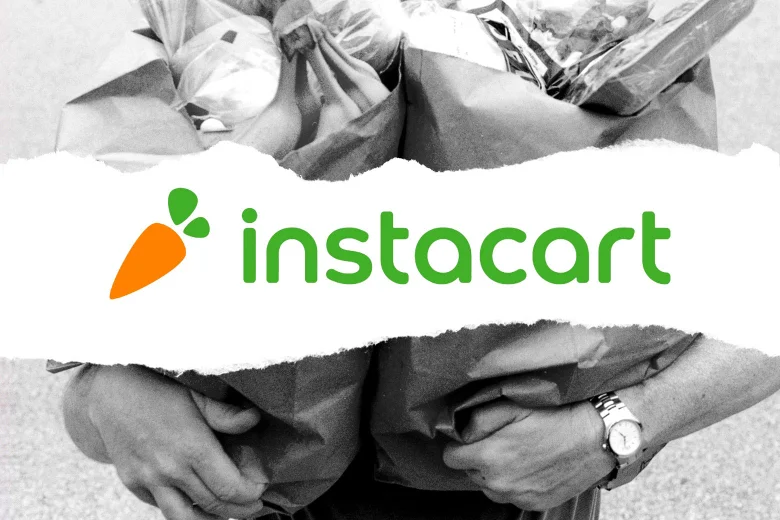

##Overview

###About The Business

Instacart was founded in 2012 by entrepreneur Apoorva Mehta, a former Amazon employee who helped develop their fulfillment system as a supply chain engineer. He quit his job in 2010 and wanted to explore being an entreneurer. He had various ideas but none of them clicked until Instacart. His rationale: grocery shopping was a pain and he actually cared about the problem enough to do something about it.

Instacart started in San Francisco as an undermanned business to being a juggernaut in online grocery shopping services. They now offer their services in more than 5,500 cities and 30,000 stores in North America with partner like Publix, Aldi, and Costco.

###What is Market Basket Analysis?

Market basket analysis is a technique used by retailers with the goal of increasing sale by better understanding customer purchasing patterns. There are two types of market basket analysis: predictive market basket analysis and differential market basket analysis. Predicitve analyis considers what items a user has purchased to better reccommend products in the future. Whereas differential analysis examines different customer groups to highlight factors that may cause sales to be high in some areas or low in others.




##Exploring The Data

###Acessing The Data

I was able to access the data using two methods. The first using the Kaggle API and downloading the zip file directly into colab. Using the second, I accessed the data directly from SUNY Buffalo State's server which is available to DSA students.

In [ ]:
#@title
# import json

# token={"username":"manuels919","key":"b9a8a5060ca2235fe90c82e0f3ce5ad8"}

# !mkdir ~/.kaggle

# with open('/root/.kaggle/kaggle.json','w') as file:
#   json.dump(token, file)
  
# !chmod 600 /root/.kaggle/kaggle.json 

#!kaggle datasets download -d psparks/instacart-market-basket-analysis
#!unzip \*.zip

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns
import numpy as np

colors = []
for x, y in mcolors.CSS4_COLORS.items():
  colors.append(y)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#@title
# aisles = pd.read_csv('http://136.183.56.191/DSA501/instacart_data/aisles.csv')
# departments = pd.read_csv('http://136.183.56.191/DSA501/instacart_data/departments.csv')
# order_products__prior = pd.read_csv('http://136.183.56.191/DSA501/instacart_data/order_products__prior.csv')
# order_products__train = pd.read_csv('http://136.183.56.191/DSA501/instacart_data/order_products__train.csv')
# orders = pd.read_csv('http://136.183.56.191/DSA501/instacart_data/orders.csv')
# products = pd.read_csv('http://136.183.56.191/DSA501/instacart_data/products.csv')

In [ ]:
url = 'http://136.183.139.117/dsa501data/instacart/'

files=['aisles', 'departments', 'order_products__prior', 'order_products__train', 'orders', 'products']
for file in files:
  globals()[file]=pd.read_csv(url+file+'.csv')

###The Data

In 2017 Instacart publically released their first dataset, "The Instacart Online Grocery Shopping Dataset 2017". The dataset was anonymized and contains over 3 million orders from more than 200,000 Instacart users.

“The Instacart Online Grocery Shopping Dataset 2017” was originally accessable through from https://www.instacart.com/datasets/grocery-shopping-2017. But is no longer available as of now. However, the data was downloaded and uploaded to Kaggle and can be accessed via API. It contains six files that include information about the products, departments, aisles, and the orders. I will be exploring these datasets to determine what conclusions can be drawn.

In [ ]:
#@title
features_dict={}
for file in files:
  features_dict[file]=[globals()[file].columns.values]
df=pd.DataFrame(features_dict).T #creates a dataframe with the object dtype
df.rename(columns = {0:'Features'}, inplace=True)
df.index.name = "File"
df = df.style.set_properties(**{'text-align': 'left'}) #aligns columns to the left.
df

,Features
File,
aisles,['aisle_id' 'aisle']
departments,['department_id' 'department']
order_products__prior,['order_id' 'product_id' 'add_to_cart_order' 'reordered']
order_products__train,['order_id' 'product_id' 'add_to_cart_order' 'reordered']
orders,['order_id' 'user_id' 'eval_set' 'order_number' 'order_dow' 'order_hour_of_day' 'days_since_prior_order']
products,['product_id' 'product_name' 'aisle_id' 'department_id']


aisles (features):

* aisle_id - Each number represents an aisle
* aisle - The corresponding aisle name for each aisle_id

departments (features):

* department_id - Each number represents a department
* department - The corresponding department name for each department_id

order_products__prior (features):
* order_id - Each number represent the ID of an order
* product_id - Each number represents a product that is in stock
* add_to_cart_order - The order in which each item was added to the cart
* reordered - Whether or not the item was reordered. 0 = False and 1 True

order_products_train (features):
* order_id - Each number represent the ID of an order
* product_id - Each number represents a product that is in stock
* add_to_cart_order - The order in which each item was added to the cart
* reordered - Whether or not the item was reordered. 0 = False and 1 True

orders (features):
* order_id - Each number represent the ID of an order
* user_id - Each number represents the ID of a user that placed an order
* eval_set - Indicates whether the order placed was a prior order or a train(the last order placed for a user)
* order_number - The number of the order placed by a user
* order_dow - The day of the week the order was placed
* order_hour_of_day - The hour of the day the order was placed
* days_since_prior_order - Days since the last order was placed

products (features):
* product_id - Each number represents a product that is in stock
* product_name - The corresponding product name for each product_id
* aisle_id - Each number represents an aisle
* department_id - Each number represents a department

###Checking For Missing Values

For each dataset I checked to see if any values were missing. The only feature that was missing values was the **days_since_prior_order** column in the orders dataframe.

In [ ]:
for file in files:
  print(globals()[file].isnull().sum())

aisle_id    0
aisle       0
dtype: int64
department_id    0
department       0
dtype: int64
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


###Displaying the data sets

In [ ]:
#@title
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [ ]:
display(files[0], files[1], files[2])

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [ ]:
display(files[3], files[4], files[5])

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


####How many orders are placed per user?

The Instacart data contains over 200,000 users. Below, 80 percent of users have only placed 0 to 25 orders. Subsequently, the percentage of users that placed between 25 to 50 and 50 to 100 dropped dramatically to 15 and 5 respectively. Why do most users not place more than 25 orders? What can be done to increase the number of orders that user place?

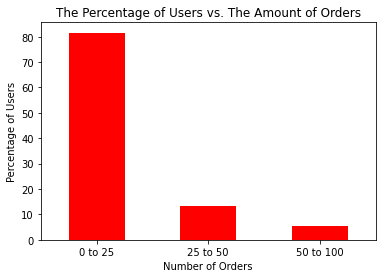

In [ ]:
#@title
temp = orders.groupby(['user_id']).count() #groupby userID to get the count for each column
                                          #in this case i want the number or orders each user placed or the count of the orderIDs
ordersAmount = pd.cut(temp['order_id'], bins=[0, 25, 50, 100], include_lowest=True) #cut the orderID count column into bins
ordersNorm = ordersAmount.value_counts(sort=False, normalize=True).mul(100) #calculates the percentage
ax = ordersNorm.plot.bar(rot=0, color="r", figsize=(6,4))
ax.set_xticklabels(['0 to 25', '25 to 50', '50 to 100'])
plt.ylabel("Percentage of Users")
plt.xlabel("Number of Orders")
plt.title("The Percentage of Users vs. The Amount of Orders")
plt.show()

####How many orders were placed on a given day?

Originally, I had interpretted this graph as most orders being placed on Sunday and Monday but in actuality most orders were placed on Saturday and Sunday. (Saturday is represented as 0 and Sunday is represented as 1). It would make more sense for the amount of orders to be the most on the weekend when people are not only the busiest but are also preparing for the start of the next week.

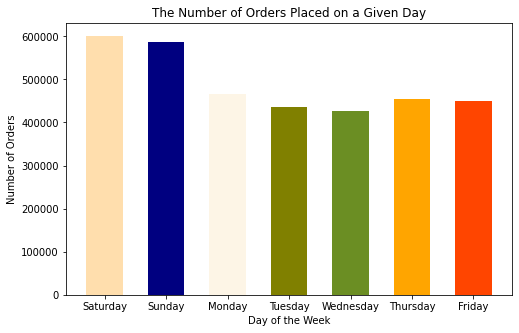

In [ ]:
#@title
orderPerDay= orders.groupby('order_dow').count()
plt.figure(figsize=(8,5))
plt.bar(orderPerDay.index, orderPerDay['order_id'], width=0.6, color=colors[100:107])
plt.axes().set_xticklabels(['0', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.ylabel("Number of Orders")
plt.xlabel("Day of the Week")
plt.title("The Number of Orders Placed on a Given Day")
plt.show();

####What times were most orders placed?

Depending on location some stores are open 24 hours a day which allows Instacart orders to be placed as early or late as 12 am. However, most of the orders were placed between 9 am and 5 pm, just barely peaking at 10 am. 

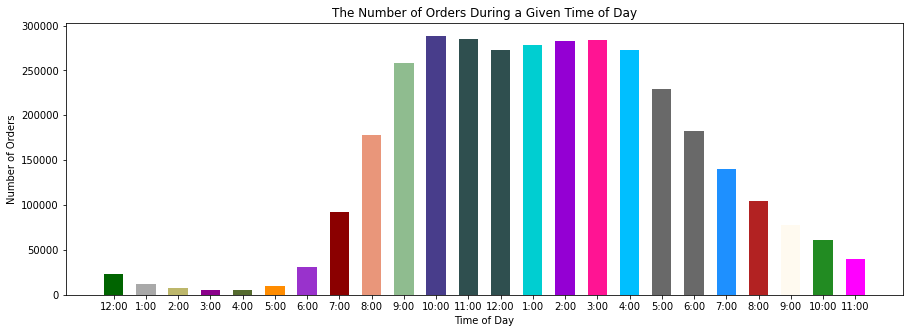

In [ ]:
#@title
orderPerHour= orders.groupby('order_hour_of_day').count()
plt.figure(figsize=(15,5))
plt.set_cmap('gist_rainbow')
plt.bar(orderPerHour.index, orderPerHour['order_id'], width=0.6, color=colors[25:50])
plt.xticks(np.arange(0, 24))
plt.axes().set_xticklabels(x + ':00' for x in ['12', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
plt.ylabel("Number of Orders")
plt.xlabel("Time of Day")
plt.title("The Number of Orders During a Given Time of Day")
plt.show();

####What department are the most products sold from?

The department that sold the most products was the produce department with 9,479,291 items sold. The snacks department came in second with 2,887,550 and the beverages department third with 2,690,129. 

The amount of items sold in the produce department is dramatically greater than the other departments. In other words the top products are likely to be either fruits or vegetables.

In [ ]:
#@title
topDepartments = pd.merge(pd.merge(departments,products, on='department_id'), order_products__prior[['product_id','order_id']], on='product_id')
topDepCount = topDepartments.groupby('department').count()

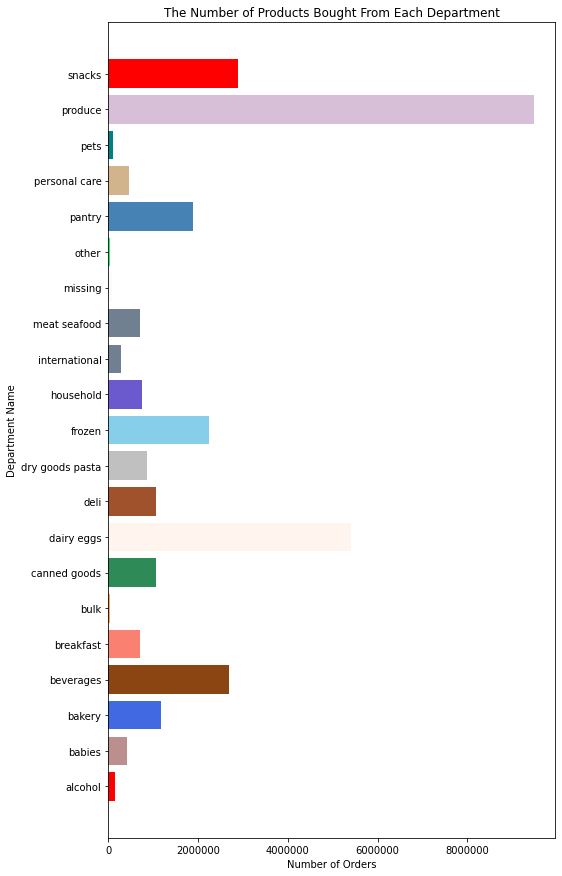

In [ ]:
#@title
plt.figure(figsize=(8,15))
plt.barh(topDepCount.index, topDepCount['department_id'], color=colors[120:140])
plt.axes().ticklabel_format(style='plain', axis='x')
plt.ylabel("Department Name")
plt.xlabel("Number of Orders")
plt.title("The Number of Products Bought From Each Department")
plt.show();

####What are the top 20 most sold products?

As i predicted earlier since most items were sold from the produce department it is only natural that the top twenty products sold are produce. Bananas and strawberries are the most popular.

In [ ]:
#@title
top20 = pd.merge(order_products__prior.groupby(['product_id']).count(), products[['product_id', 'product_name']], on='product_id').nlargest(n=20, columns=['order_id'])

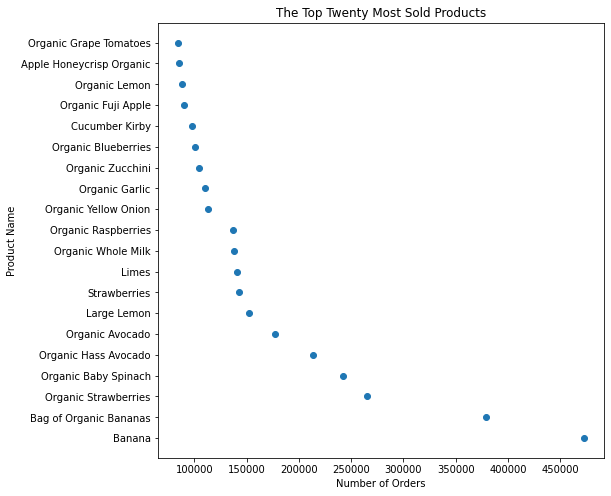

In [ ]:
#@title
plt.figure(figsize=(8,8))
plt.scatter(top20['order_id'], top20['product_name'],)
plt.ylabel("Product Name")
plt.xlabel("Number of Orders")
plt.title("The Top Twenty Most Sold Products")
plt.show();

####Which product was purchased first at least half of the time by most customers?

The item that most customers add to their cart first is surpsingly Fresh Foaming Cleanser. 

In [ ]:
#@title
firstHalf =pd.merge(order_products__prior[order_products__prior['add_to_cart_order'] == 1], orders[['order_id', 'user_id', 'order_number']], on='order_id' )
firstHalf.set_index('user_id', inplace=True) #set the user_id as the index
firstHalf['first_half_orders'] = (firstHalf.groupby('user_id').max()//2)['order_number'] #for each user_id find the max # of orders and divide by 2 to get the first half and create a new column

In [ ]:
#@title
firstHalfFinal = firstHalf[firstHalf['order_number'] < firstHalf['first_half_orders']] #filter out all of the rows that are not apart of the first half of orders

In [ ]:
#@title
products.iloc[firstHalfFinal['product_id'].max()-1] #Search the products table to find the name of the most purchased product

product_id                        49688
product_name     Fresh Foaming Cleanser
aisle_id                             73
department_id                        11
Name: 49687, dtype: object

###Conclusion

Though this is just a small sample I was still able to draw conclusion which can likely be applied to Instacart to further enhance their product.

The main point that I took away is that most users are not continuing to the use the service. If I were to further explore this, I would want to find out why users are not placing more orders? What can be done to increase the number of orders current users are placing?

Additionally, I would try to implement some machine learning. Application rules would allow us to predict what products are likely to be purchased together.

In [ ]:
#@title
productTemp =  pd.merge(order_products__prior[['order_id', 'product_id']], orders[['order_id', 'user_id', 'order_dow', 'order_hour_of_day']], on='order_id')
productPer = pd.merge(productTemp, products[['product_id', 'product_name']], on='product_id')

In [ ]:
%%shell
jupyter nbconvert --to html /content/Manuel_DSA501_Final_project.ipynb

[NbConvertApp] Converting notebook /content/Manuel_DSA501_Final_project.ipynb to html
[NbConvertApp] Writing 906465 bytes to /content/Manuel_DSA501_Final_project.html
